In [ ]:
import zipfile
import sys

# Extract ZIP file
with zipfile.ZipFile('/content/digital_phantom_package.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/digital_phantom_package')

# Add extracted package location to Python path
sys.path.append('/content/digital_phantom_package')

In [ ]:
%cd /content/digital_phantom_package/digital_phantom_package

/content/digital_phantom_package/digital_phantom_package


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 64.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 49.0 MB/s eta 0:00:00
  Created wheel for pyradiomics: filename=pyradiomics-3.0.1-cp310-cp310-linux_x86_64.whl size=169706 sha256=f46b62d48e73f7648fda4866528808d714f550f3e912c299237aaf55ac9c1034
  Stored in directory: /root/.cache/pip/wheels/91/c5/13/c5fd4c5ad3edf4062bb3855bd66fad25871c9c6dc0b3

# Libraries imports

In [ ]:
from digital_phantom_package.intensity_based_stat import IntensityBasedStat

import numpy as np
import matplotlib.pyplot as plt

import dicom2nifti
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import os

import requests, zipfile, io

# **Loading data from Github repo**

In [ ]:
%cd /content/

/content


In [ ]:
req = requests.get("https://github.com/theibsi/data_sets/archive/refs/heads/master.zip")
z = zipfile.ZipFile(io.BytesIO(req.content))
z.extractall()

## Loading image phantom

In [ ]:
image_nifti = nib.load('/content/data_sets-master/ibsi_1_ct_radiomics_phantom/nifti/image/phantom.nii.gz')
type(image_nifti)

nibabel.nifti1.Nifti1Image

In [ ]:
print(image_nifti.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 204 201  60   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    0.977 0.977 3.    0.    0.    0.    0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 174.3945
qoffset_y       : 79.6255
qoffset_z       : -100.4
srow_x          : 

In [ ]:
image_data = image_nifti.get_fdata()
image_data.shape

(204, 201, 60)

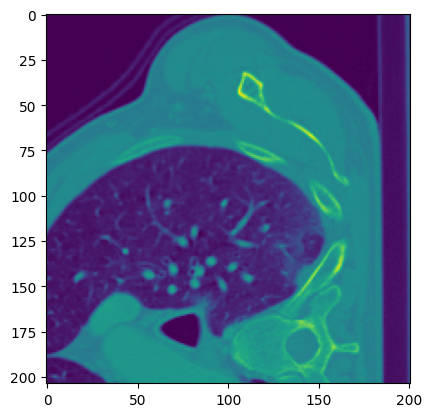

In [ ]:
test = image_data[:,:,59]
plt.imshow(test)
plt.show()

# Exploring several plotting libraries

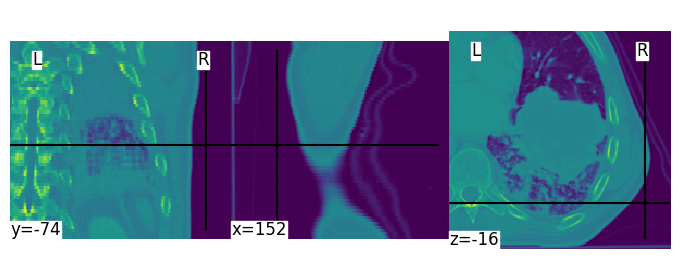

In [ ]:
from nilearn import plotting

plotting.plot_img(image_nifti)
plt.show()

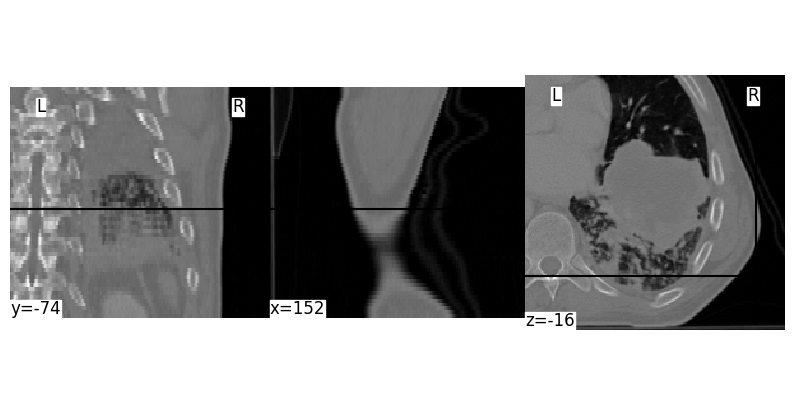

In [ ]:
from nilearn import plotting

fig, ax = plt.subplots(figsize=[10, 5])
plotting.plot_img(image_nifti, cmap='gray', axes=ax)
plt.show()

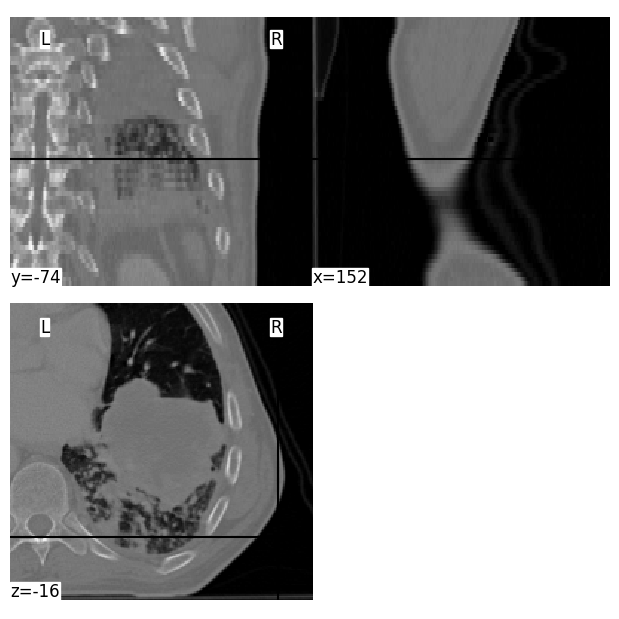

In [ ]:
plotting.plot_img(image_nifti, display_mode='tiled', cmap='gray')
plt.show()

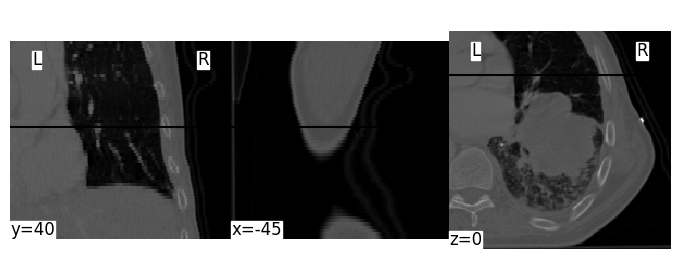

In [ ]:
plotting.plot_img(image_nifti, cmap='gray', cut_coords=(-45, 40, 0))
plt.show()

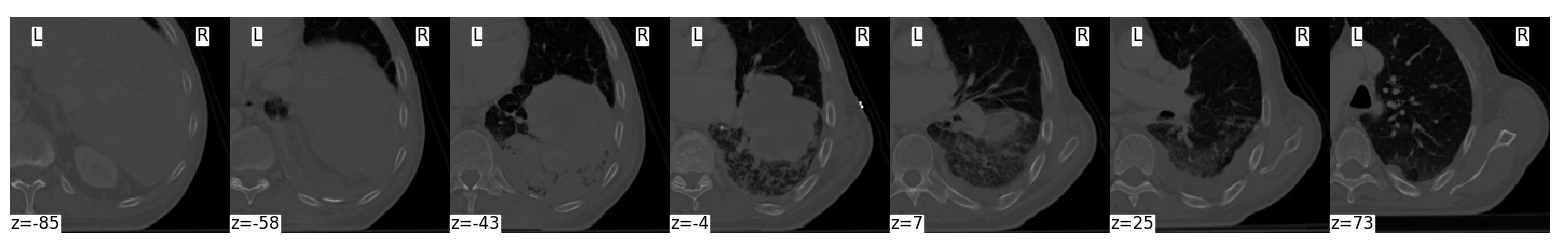

In [ ]:
plotting.plot_img(image_nifti, display_mode='z', cmap='gray')
plt.show()

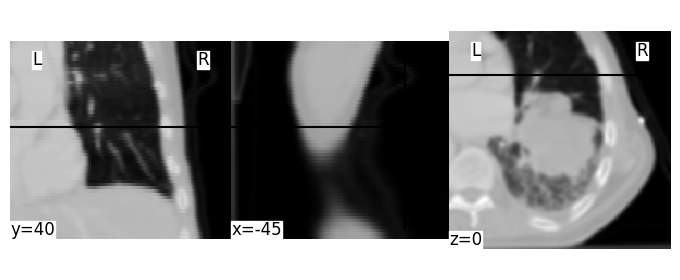

In [ ]:
from nilearn import image

fwhm = 4

image_nifti_smth = image.smooth_img(image_nifti, fwhm)
plotting.plot_img(image_nifti_smth, cmap='gray', cut_coords=(-45, 40, 0))
plt.show()

In [ ]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = image_data.shape[2]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

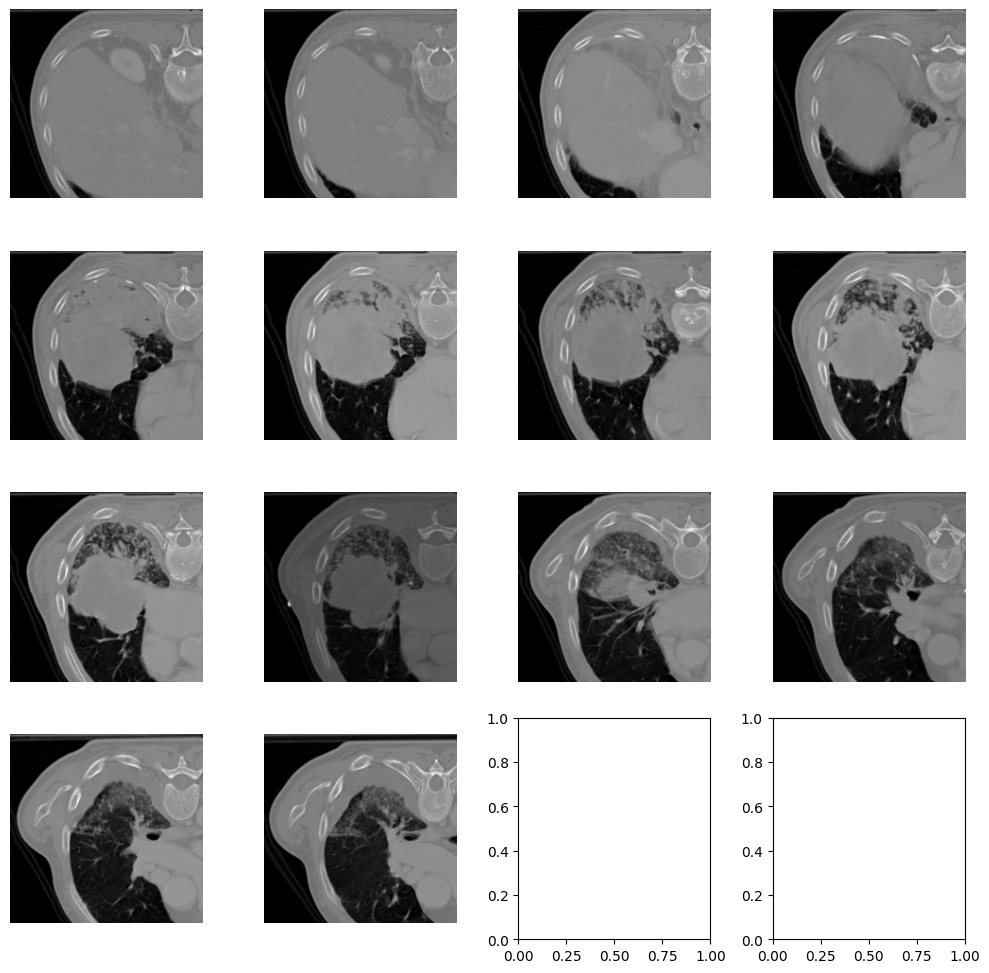

In [ ]:
fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(image_data[:, :, img], 90), cmap='gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()

## Slice through a different axis

In [ ]:
n_slice = image_data.shape[1]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

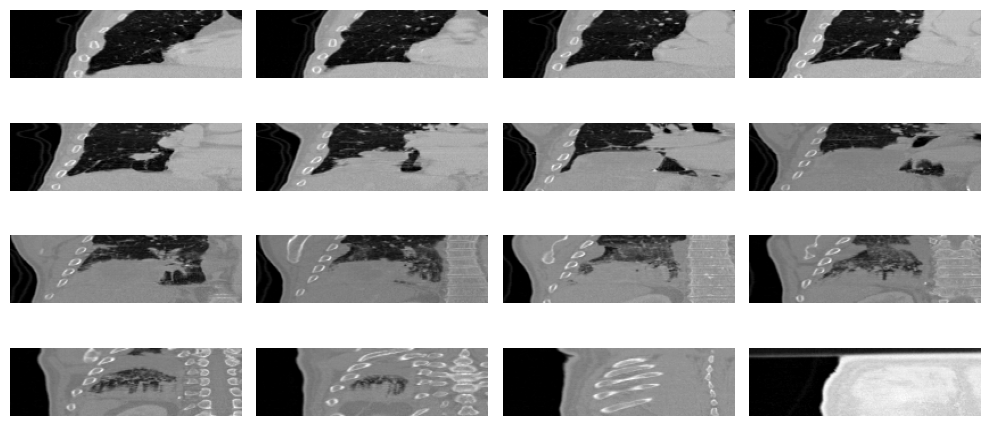

In [ ]:
fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 5])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(image_data[:, img, :], 90), cmap='gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
n_slice = image_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

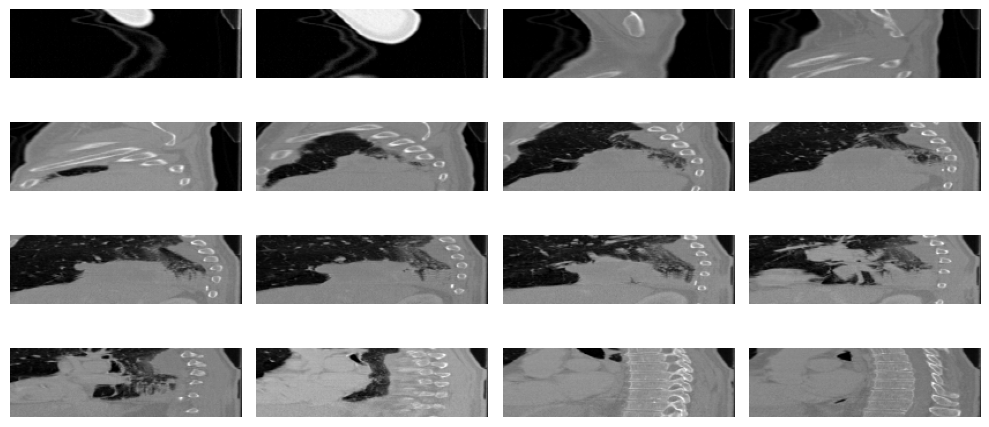

In [ ]:
fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 5])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(image_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()

## **Gaussian smoothing - To reduce noise**

In [ ]:
sigma = 2
smoothed = ndi.gaussian_filter(image_data, sigma)

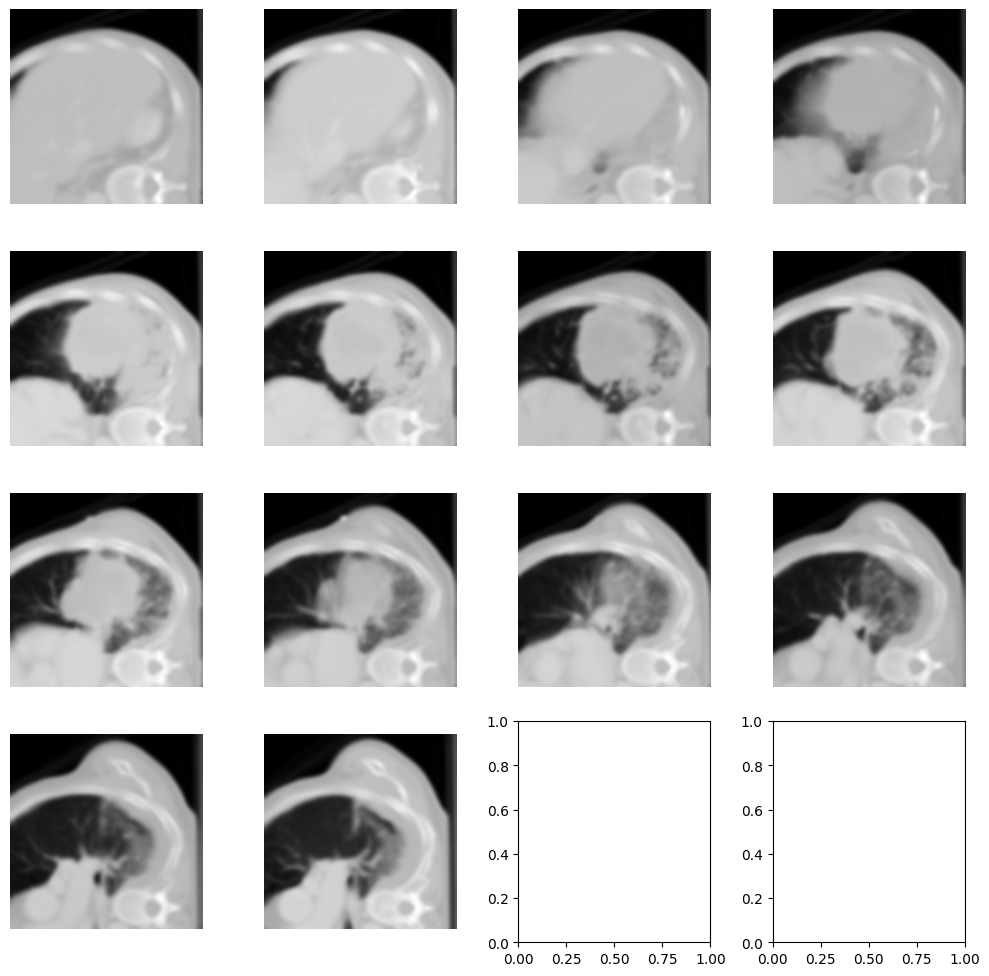

In [ ]:
fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(smoothed[:, :, img], cmap='gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()

# Image histogram

Histograms of the anatomical images show the number of voxels of a given intensity value. These can be informative because the distribution of intensity values in an anatomical image is not uniform.

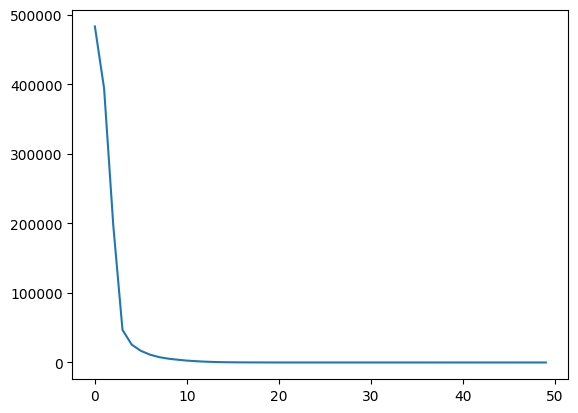

In [ ]:
plt.plot(ndi.histogram(image_data, min=0, max=np.max(image_data), bins=50))
plt.show()

In the histogram above, there is a large peak close to zero which represents the fact that a large number of voxels in the image don’t contain the tumor, and therefore have values at or close to zero.

## Loading Mask

In [ ]:
mask_nifti = nib.load('/content/data_sets-master/ibsi_1_ct_radiomics_phantom/nifti/mask/mask.nii.gz')
type(mask_nifti)

nibabel.nifti1.Nifti1Image

In [ ]:
mask_data = mask_nifti.get_fdata()
mask_data.shape

(204, 201, 60)

In [ ]:
n_slice = mask_data.shape[2]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

In [ ]:
mask_data[:, :, 59]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

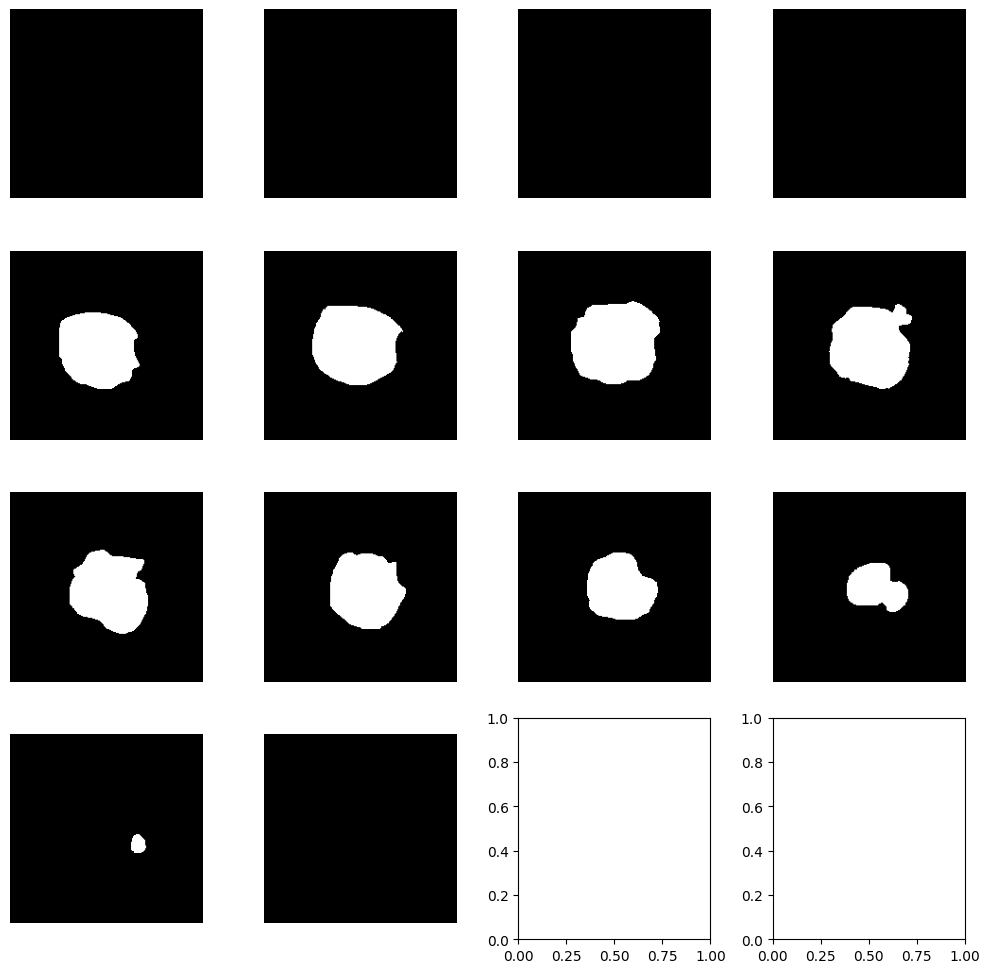

In [ ]:
fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(mask_data[:, :, img], 90), cmap='gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()

# Computing the based-intensity statistical features

In [ ]:
n_slice = image_data.shape[2]
step_size = n_slice // n_subplots
start_stop = int((n_slice - plot_range) / 2)

In [ ]:
np.sum(mask_data[:,:,1])

0.0

In [ ]:
import SimpleITK as sitk

img_dict = {}

for index, img in enumerate(range(start_stop, plot_range, step_size)):
    # Convert NumPy arrays to SimpleITK images
    image = sitk.GetImageFromArray(image_data[:,:,img])
    mask = sitk.GetImageFromArray(mask_data[:,:,img])

    # Check if there are valid voxels in the mask
    if np.sum(mask) == 0:
        pass
    else:
        # Create an instance of the IntensityBasedStat class
        intensity_stat = IntensityBasedStat(image, mask)
        # Calculate the statistical features
        mean_intensity = intensity_stat.getMeanIntensity()
        variance_intensity = intensity_stat.getVarianceIntensity()
        skewness_intensity = intensity_stat.getIntensitySkewness()
        kurtosis_intensity = intensity_stat.getIntensityKurtosis()
        median_intensity = intensity_stat.getMedianIntensity()
        minimum_intensity = intensity_stat.getMinimumIntensity()
        percentile10_intensity = intensity_stat.get10IntensityPercentile()
        percentile90_intensity = intensity_stat.get90IntensityPercentile()
        maximum_intensity = intensity_stat.getMaximumIntensity()
        interquartile_range_intensity = intensity_stat.getIntensityInterquartileRange()
        intensity_range = intensity_stat.getIntensityRange()
        mean_absolute_deviation = intensity_stat.getIntensityMeanAbsoluteDeviation()
        robust_mean_absolute_deviation = intensity_stat.getIntensityRobustMeanAbsoluteDeviation()
        median_absolute_deviation = intensity_stat.getIntensityMedianAbsoluteDeviation()
        coefficient_of_variation = intensity_stat.getIntensityCoefficientOfVariation()
        quartile_coefficient_of_dispersion = intensity_stat.getIntensityQuartileCoefficientOfDispersion()
        intensity_energy = intensity_stat.getIntensityEnergy()
        root_mean_square_intensity = intensity_stat.getRootMeanSquareIntensity()
        standard_deviation_intensity = intensity_stat.getStandardDeviationIntensity()

        # Define the statistical features dictionary
        features = {
            "Mean Intensity": mean_intensity,
            "Variance Intensity": variance_intensity,
            "Skewness Intensity": skewness_intensity,
            "Kurtosis Intensity": kurtosis_intensity,
            "Median Intensity": median_intensity,
            "Minimum Intensity": minimum_intensity,
            "10th Percentile Intensity": percentile10_intensity,
            "90th Percentile Intensity": percentile90_intensity,
            "Maximum Intensity": maximum_intensity,
            "Interquartile Range Intensity": interquartile_range_intensity,
            "Intensity Range": intensity_range,
            "Mean Absolute Deviation": mean_absolute_deviation,
            "Intensity Robust Mean Absolute Deviation": robust_mean_absolute_deviation,
            "Intensity Median Absolute Deviation": median_absolute_deviation,
            "Intensity Coefficient Of Variation": coefficient_of_variation,
            "Intensity Quartile Coefficient Of Dispersion": quartile_coefficient_of_dispersion,
            "Intensity Energy": intensity_energy,
            "Root Mean Square Intensity": root_mean_square_intensity,
            "Standard Deviation Intensity": standard_deviation_intensity
        }

        img_dict['image '+str(index)] = features


In [ ]:
img_dict

{'image 4': {'Mean Intensity': array([40.57606746]),
  'Variance Intensity': array([11554.07736767]),
  'Skewness Intensity': array([-4.58321764]),
  'Kurtosis Intensity': array([28.00243891]),
  'Median Intensity': array([63.]),
  'Minimum Intensity': array([-962.]),
  '10th Percentile Intensity': array([10.]),
  '90th Percentile Intensity': array([98.]),
  'Maximum Intensity': array([377.]),
  'Interquartile Range Intensity': array([42.]),
  'Intensity Range': array([1339.]),
  'Mean Absolute Deviation': array([51.12007412]),
  'Intensity Robust Mean Absolute Deviation': array([17.78277717]),
  'Intensity Median Absolute Deviation': array([21.]),
  'Intensity Coefficient Of Variation': array([2.64909591]),
  'Intensity Quartile Coefficient Of Dispersion': array([0.3442623]),
  'Intensity Energy': array([73579557.]),
  'Root Mean Square Intensity': array([114.89340546]),
  'Standard Deviation Intensity': array([107.48989426])},
 'image 5': {'Mean Intensity': array([34.35825594]),
  'V

# **Exporting results to CSV**

In [ ]:
import csv

# Write to a CSV file
output_file = "intensity_based_statistical_features.csv"
with open(output_file, "w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile)

    # Write the header row
    csvwriter.writerow(["Image", "Feature", "Value"])

  # Write the data rows
    for image, features in img_dict.items():
        for feature, value in features.items():
            csvwriter.writerow([image, feature, value[0]])

print(f"Features written to {output_file}")


Features written to intensity_based_statistical_features.csv


# **References**

https://neuraldatascience.io/8-mri/read_viz.html

https://pyradiomics.readthedocs.io/en/latest/index.html

https://arxiv.org/pdf/1612.07003.pdf

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8947946/

https://www.mdpi.com/2218-1989/10/10/416

https://www.nature.com/articles/s41598-022-13967-8
